# Image Captioning

In [9]:
import PIL
import cv2
import matplotlib.pyplot as plt
from langchain.agents import initialize_agent

# Loading Model

In [8]:
import requests
import PIL
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")


# Image from Browser

a photography of a woman and her dog on the beach
woman sitting on the beach with her dog and a cell phone


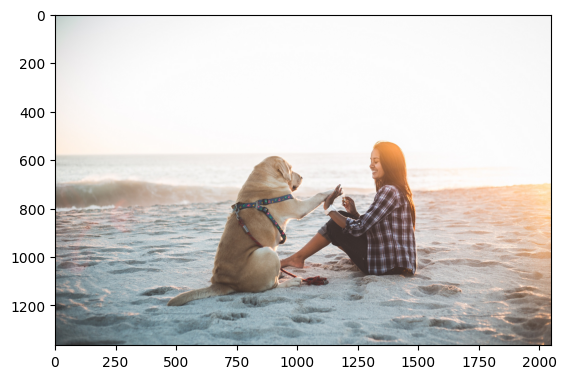

In [7]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
#a=cv2.imread(img_url)
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
plt.imshow(raw_image)
print(processor.decode(out[0], skip_special_tokens=True))


# Image in Local directory 

/Users/MuhammadIkrmaSharaf/Desktop/blipProcessor/lib/python3.11/site-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated caption: araffe cat walking across a street in the sun


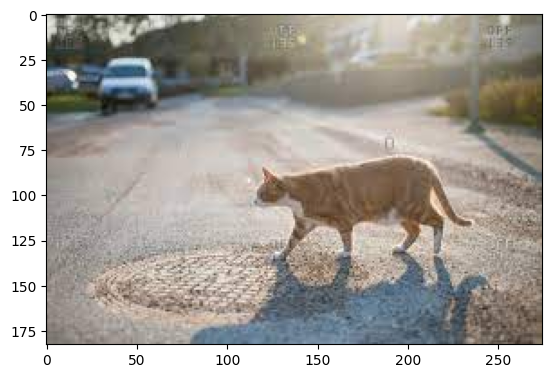

In [5]:
image_path = "cat.jpeg"  # Replace with the path to your local image file
raw_image = Image.open(image_path).convert('RGB')

#text = ""
inputs = processor(raw_image, return_tensors="pt")
out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)
plt.imshow(raw_image)

print("Generated caption:", caption)